In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from Bio import Entrez
from tqdm import tqdm
import pickle
from pickle5 import pickle

In [2]:
data = pd.read_csv (r'data/SFARI-Genes.csv')
cols = data.columns
N, D = data.shape

In [5]:
gene2go = open_pickle_file("gene2go.pickle")
eid = parse_eid()
gene_symbols = data['gene-symbol'].unique()

In [4]:
def save_to_txt_file(contents, filename):
    DIR = os.getcwd() + "/results/" + filename
    
    with open(DIR, "w") as f:
        f.write(contents)
        
def open_txt_file(filename):
    DIR = os.getcwd() + "/results/" + filename
    
    with open(DIR) as f:
        return f.readlines()
    
def save_to_pickle_file(contents, filename):
    DIR = os.getcwd() + "/data/" + filename
    
    with open(DIR, "wb") as handle:
        pickle.dump(contents, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def open_pickle_file(filename):
    DIR = os.getcwd() + "/data/" + filename
    
    with open(DIR, "rb") as handle:
        data = pickle.load(handle)
        
    return data

def save_to_npy_file(contents, filename):
    np.save(os.getcwd() + "/data/" + filename, contents)
    
def open_npy_file(filename):
    np.load(os.getcwd() + "/data/" + filename, allow_pickle=True)
    
def parse_eid():
    DIR = os.getcwd() + "/results/task2-1-eid.txt"
    eid = {}
    
    with open(DIR) as f:
        lines = f.readlines()
        
    for l in lines:
        t1 = l.replace("\n", "").split(": ")
        gene = t1[0]

        if len(t1) > 1:
            eid[gene] = t1[1].split(", ")
        else:
            eid[gene] = ""
               
    return eid

def get_entrezs(symbols):
    entrezs = {}
    
    for s in symbols:
        entrezs[s] = eid[s]
        
    return entrezs

def get_GO_indexes(symbols):
    indexes = {}
    entrezs = get_entrezs(symbols)
    errors = 0
    
    tax_ids = gene2go["#tax_id"]
    human_gene_indexes = tax_ids[tax_ids == "9606"].index
    human_genes = gene2go.filter(items=human_gene_indexes, axis = 0)
    human_gene_ids = human_genes["GeneID"]

    for g in tqdm(gene_symbols):
        gene_entrez = eid[g]

        if len(gene_entrez) == 0:
            print(g)
            continue
        else:
            gene_entrez = gene_entrez[0]

        gene_index = human_gene_ids[human_gene_ids == gene_entrez].index.unique()

        indexes[g] = gene_index
    
    if errors > 0:
        print("Warning {} errors exist".format(errors))
        
    return indexes

def get_GO_cols(cols, indexes):
    cols_data = []
    output = []
    
    for c in cols:
        cols_data.append(gene2go[c].filter(items=indexes, axis=0))
    
    ids = cols_data[0].values
    descs = cols_data[1].values

    assert(len(ids) == len(descs))

    for i in range(len(ids)):
        output.append([ids[i], descs[i]])
    
    return output

In [6]:
genes_no_ids = ["MSNP1AS", "RP11-1407O15.2", "RPS10P2-AS1"]
symbol_data = data["gene-symbol"]
indexes = []

for g in genes_no_ids:
    index = symbol_data[symbol_data == g].index[0]
    indexes.append(index)
    
new_data = data.filter(items=indexes, axis=0)
print(indexes)
display(new_data)

[576, 771, 790]


,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
576,9,MSNP1AS,"Moesinpseudogene 1, antisense",NaN,5,"Genetic Association, Functional",2.0,0,13
771,9,RP11-1407O15.2,NaN,NaN,17,Rare Single Gene Mutation,3.0,0,1
790,9,RPS10P2-AS1,ribosomal protein S10 pseudogene 2 anti-sense 1,NaN,20,"Genetic Association, Functional",2.0,0,4


# Task 1

In [7]:
gene_symbols = data['gene-symbol'].unique()
print(gene_symbols.size)

1023


In [5]:
# Save Entrez scores

In [50]:
Entrez.email = "s1803764@ed.ac.uk"
output = ""
eid = {}

for i in tqdm(range(gene_symbols.size)):
    g = gene_symbols[i]
    handle = Entrez.esearch(db="gene", retmax=10, term=f"({g}[sym]) AND homo sapiens[Organism]")
    record = Entrez.read(handle)
    
    if len(record['IdList']) > 0:
        output += g + ": " + record['IdList'][0]
        print(g)
        print(record['IdList'])
        output += "\n"
        eid[g] = record['IdList'][0]
    else:
        eid[g] = ""
        output += g +": \n"
    
save_to_txt_file(output, "task2-1-eid.txt")

  0%|                                          | 1/1023 [00:00<12:32,  1.36it/s]

ABAT
['18']


  0%|                                          | 2/1023 [00:01<11:32,  1.47it/s]

ABCA10
['10349']


  0%|                                          | 3/1023 [00:01<10:53,  1.56it/s]

ABCA13
['154664']


  0%|▏                                         | 4/1023 [00:02<10:58,  1.55it/s]

ABCA7
['10347']


  0%|▏                                         | 5/1023 [00:03<11:14,  1.51it/s]

ACE
['1636']


  1%|▏                                         | 6/1023 [00:03<10:49,  1.57it/s]

ACHE
['43']


  1%|▎                                         | 7/1023 [00:04<10:25,  1.62it/s]

ACTB
['60', '728378']


  1%|▎                                         | 8/1023 [00:05<10:26,  1.62it/s]

ACTL6B
['51412']


  1%|▎                                         | 9/1023 [00:05<10:10,  1.66it/s]

ACTN4
['81']


  1%|▍                                        | 10/1023 [00:06<10:03,  1.68it/s]

ACY1
['95']


  1%|▍                                        | 11/1023 [00:06<09:47,  1.72it/s]

ADA
['100']


  1%|▍                                        | 12/1023 [00:07<10:03,  1.68it/s]

ADCY3
['109', '114']


  1%|▌                                        | 13/1023 [00:08<10:09,  1.66it/s]

ADCY5
['111']


  1%|▌                                        | 14/1023 [00:08<10:00,  1.68it/s]

ADK
['132']


  1%|▌                                        | 15/1023 [00:09<10:03,  1.67it/s]

ADNP
['23394']


  2%|▋                                        | 16/1023 [00:09<10:02,  1.67it/s]

ADORA3
['140']


  2%|▋                                        | 17/1023 [00:10<09:58,  1.68it/s]

ADSL
['158']


  2%|▋                                        | 18/1023 [00:10<09:34,  1.75it/s]

AFF2
['2334']


  2%|▊                                        | 19/1023 [00:11<09:44,  1.72it/s]

AGAP1
['116987']


  2%|▊                                        | 19/1023 [00:11<10:23,  1.61it/s]


KeyboardInterrupt: 

# Task 2

In [7]:
gene2go = pd.read_csv(os.getcwd() + "/data/archive/gene2go", dtype=str, delimiter="\t")
save_to_pickle_file(gene2go, "gene2go.pickle")

In [75]:
gene2go

,#tax_id,GeneID,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
0,3702,814629,GO:0005634,ISM,located_in,nucleus,-,Component
1,3702,814629,GO:0008150,ND,involved_in,biological_process,-,Process
2,3702,814630,GO:0003700,ISS,enables,DNA-binding transcription factor activity,11118137,Function
3,3702,814630,GO:0005634,ISM,located_in,nucleus,-,Component
4,3702,814630,GO:0006355,TAS,acts_upstream_of_or_within,"regulation of transcription, DNA-templated",11118137,Process
...,...,...,...,...,...,...,...,...
2084173,559292,65052912,GO:0005575,ND,is_active_in,cellular_component,-,Component
2084174,559292,65052912,GO:0008150,ND,involved_in,biological_process,-,Process
2084175,559292,65052913,GO:0003674,ND,enables,molecular_function,-,Function
2084176,559292,65052913,GO:0005575,ND,is_active_in,cellular_component,-,Component


In [53]:
gene2go = open_pickle_file("gene2go.pickle")
eid = parse_eid()

In [101]:
len(eid)

1023

In [94]:
go_terms = {}

errors = 0

tax_ids = gene2go["#tax_id"]
human_gene_indexes = tax_ids[tax_ids == "9606"].index
human_genes = gene2go.filter(items=human_gene_indexes, axis = 0)
human_gene_ids = human_genes["GeneID"]

for g in tqdm(gene_symbols):
    gene_entrez = eid[g]
    
    if len(gene_entrez) == 0:
        break
    else:
        gene_entrez = gene_entrez[0]

    gene_index = human_gene_ids[human_gene_ids == gene_entrez].index#.unique()
    #if gene_index.size >= 1:
    #    if not gene_index[0] in human_gene_indexes:
    #        errors += 1
    #        continue
    #    else:
    #        gene_index = int(gene_index[0])
    #print(gene_index)
    #print()
    if gene_index.size == 0:
        print(g)
        print(gene_entrez)
        errors += 1

    go_term = [gene2go.iloc[idx]["GO_term"] for idx in gene_index]
    go_terms[g] = go_term

print(errors)
save_to_pickle_file(go_terms, "go-terms.pickle")

 14%|█████▌                                  | 143/1023 [00:01<00:10, 85.17it/s]

CCSER1
401145


 31%|████████████▎                           | 314/1023 [00:03<00:08, 83.37it/s]

FAM47A
158724


 54%|█████████████████████▍                  | 548/1023 [00:06<00:05, 83.34it/s]

METTL26
84326
MSANTD2
79684


 58%|███████████████████████▏                | 593/1023 [00:07<00:05, 83.09it/s]

MSNP1AS



 72%|████████████████████████████▊           | 737/1023 [00:08<00:03, 81.00it/s]

PTCHD1-AS
100873065


 76%|██████████████████████████████▌         | 782/1023 [00:09<00:02, 84.00it/s]

RP11-1407O15.2



 78%|███████████████████████████████▎        | 800/1023 [00:09<00:02, 84.22it/s]

RPS10P2-AS1



100%|███████████████████████████████████████| 1023/1023 [00:12<00:00, 83.18it/s]

8


In [98]:
size_sum_reps = 0
size_sum_nreps = 0
num_syms = gene_symbols.size

for s in gene_symbols:
    size_sum_reps += np.array(go_terms[s]).size
    size_sum_nreps += np.unique(go_terms[s]).size
    
print(f"With repetitions: {size_sum_reps/num_syms}")
print(f"Without repetitions: {size_sum_nreps/num_syms}")

With repetitions: 26.961876832844574
Without repetitions: 23.422287390029325


In [64]:
go_terms

{'ABAT': array(['(S)-3-amino-2-methylpropionate transaminase activity',
        '4-aminobutyrate transaminase activity',
        '4-aminobutyrate transaminase complex',
        '4-aminobutyrate:2-oxoglutarate transaminase activity', 'aging',
        'behavioral response to cocaine', 'cerebellum development',
        'copulation', 'exploration behavior',
        'gamma-aminobutyric acid biosynthetic process',
        'gamma-aminobutyric acid catabolic process',
        'gamma-aminobutyric acid metabolic process',
        'identical protein binding', 'iron-sulfur cluster binding',
        'locomotory behavior', 'metal ion binding', 'mitochondrial matrix',
        'mitochondrion', 'negative regulation of blood pressure',
        'negative regulation of dopamine secretion',
        'negative regulation of gamma-aminobutyric acid secretion',
        'negative regulation of platelet aggregation', 'neuron projection',
        'neurotransmitter catabolic process',
        'positive regulation 

In [95]:
human_gene_indexes

Int64Index([643502, 643503, 643504, 643505, 643506, 643507, 643508, 643509,
            643510, 643511,
            ...
            974915, 974916, 974917, 974918, 974919, 974920, 974921, 974922,
            974923, 974924],
           dtype='int64', length=331423)

In [100]:
go_terms

{'ABAT': 'response to hypoxia',
 'ABCA10': 'lipid transporter activity',
 'ABCA13': 'lipid transporter activity',
 'ABCA7': 'Golgi membrane',
 'ACE': 'kidney development',
 'ACHE': 'acetylcholine catabolic process in synaptic cleft',
 'ACTB': 'regulation of cyclin-dependent protein serine/threonine kinase activity',
 'ACTL6B': 'chromatin binding',
 'ACTN4': 'RNA polymerase II transcription regulatory region sequence-specific DNA binding',
 'ACY1': 'aminoacylase activity',
 'ADA': 'allantoin metabolic process',
 'ADCY3': 'adenylate cyclase activity',
 'ADCY5': 'G protein-coupled adenosine receptor signaling pathway',
 'ADK': 'RNA binding',
 'ADNP': 'chromatin',
 'ADORA3': 'G protein-coupled adenosine receptor activity',
 'ADSL': 'response to hypoxia',
 'AFF2': 'G-quadruplex RNA binding',
 'AGAP1': 'GTPase activity',
 'AGAP2': 'GTPase activity',
 'ADSS2': 'magnesium ion binding',
 'AGBL4': 'metallocarboxypeptidase activity',
 'AGMO': 'iron ion binding',
 'AGO1': 'P-body',
 'AGO3': 'conde

# Task 3

In [8]:
eid = parse_eid()
go_terms = open_pickle_file("go-terms.pickle")

In [9]:
gene_scores = data["gene-score"]
unique_gs = gene_scores.unique()#[:-1]
task3 = {}

for g in unique_gs:
    key = g
    if np.isnan(g):
        score_indexes = gene_scores[gene_scores.isnull()].index
        key = 0
    else:
        score_indexes = gene_scores[gene_scores == g].index
    print(score_indexes.size)
    symbols = data["gene-symbol"].filter(items=score_indexes, axis=0)
    task3[key] = symbols

515
221
206
81


In [10]:
task3

{3.0: 0         ABAT
 1       ABCA10
 2       ABCA13
 3        ABCA7
 4          ACE
          ...  
 1014      WWP1
 1015     XRCC6
 1016     YWHAG
 1020    ZNF827
 1022    ZWILCH
 Name: gene-symbol, Length: 515, dtype: object,
 2.0: 5          ACHE
 10          ADA
 11        ADCY3
 19        AGAP2
 23         AGO1
          ...   
 1000      ZC3H4
 1002    ZMYND11
 1013    ZNF804A
 1017      ZMIZ1
 1018      ZMYM2
 Name: gene-symbol, Length: 221, dtype: object,
 1.0: 6         ACTB
 14        ADNP
 16        ADSL
 17        AFF2
 27       AHDC1
          ...  
 984       UBR1
 998     ZBTB20
 1004    ZNF292
 1006    ZNF462
 1019    ZMYND8
 Name: gene-symbol, Length: 206, dtype: object,
 0: 7        ACTL6B
 9          ACY1
 28         AHI1
 30      ALDH1A3
 43        AP1S2
          ...   
 982       WASF1
 987       WDR26
 991         XPC
 996         YY1
 1021     ZSWIM6
 Name: gene-symbol, Length: 81, dtype: object}

In [119]:
gene_scores[gene_scores.isnull()].size

81

In [124]:
for g in unique_gs:
    print(g)
    print(task3[g].size)
    print()

3.0
515

2.0
221

1.0
206

nan


KeyError: nan

In [77]:
gene_scores = data["gene-score"]
unique_gs = gene_scores.unique()
task3 = {}


for g in unique_gs:
    score_indexes = gene_scores[gene_scores == g].index
    symbols = data["gene-symbol"].filter(items=score_indexes, axis=0)  
    task3[g] = symbols

In [149]:
task3

{3.0: 0         ABAT
 1       ABCA10
 2       ABCA13
 3        ABCA7
 4          ACE
          ...  
 1014      WWP1
 1015     XRCC6
 1016     YWHAG
 1020    ZNF827
 1022    ZWILCH
 Name: gene-symbol, Length: 515, dtype: object,
 2.0: 5          ACHE
 10          ADA
 11        ADCY3
 19        AGAP2
 23         AGO1
          ...   
 1000      ZC3H4
 1002    ZMYND11
 1013    ZNF804A
 1017      ZMIZ1
 1018      ZMYM2
 Name: gene-symbol, Length: 221, dtype: object,
 1.0: 6         ACTB
 14        ADNP
 16        ADSL
 17        AFF2
 27       AHDC1
          ...  
 984       UBR1
 998     ZBTB20
 1004    ZNF292
 1006    ZNF462
 1019    ZMYND8
 Name: gene-symbol, Length: 206, dtype: object,
 0: 7        ACTL6B
 9          ACY1
 28         AHI1
 30      ALDH1A3
 43        AP1S2
          ...   
 982       WASF1
 987       WDR26
 991         XPC
 996         YY1
 1021     ZSWIM6
 Name: gene-symbol, Length: 81, dtype: object}

# Task 4

In [11]:
gene2go = open_pickle_file("gene2go.pickle")
eid = parse_eid()

In [12]:
cols = ["GO_ID", "GO_term", "GO_count"]

indexes = get_GO_indexes(gene_symbols)

100%|███████████████████████████████████████| 1023/1023 [00:10<00:00, 95.61it/s]


In [15]:
tables = []

for score in range(4):
    score_indexes = list(task3[score].index)
    table_data = get_GO_cols(cols[0:2], score_indexes)
    
    table = pd.DataFrame(table_data, columns=cols[0:2])
    go_counts = table.value_counts().values
    go_indexes = table.value_counts().index
    
    new_table_data = []
    for i in range(go_indexes.size):
        new_table_data.append([go_indexes[i][0], go_indexes[i][1], go_counts[i]])
    
    new_table = pd.DataFrame(new_table_data, columns=cols)
    
    tables.append(new_table)

print(sum(tables[0]["GO_count"])+sum(tables[1]["GO_count"])+sum(tables[2]["GO_count"] +sum(tables[3]["GO_count"])))

save_to_pickle_file(tables, "task2.4-geneScore-GOtables-v2.pkl")

71063


In [13]:
tables = open_pickle_file("task2.4-geneScore-GOtables-v2.pkl")

In [20]:
for i in range(4):
    assert(len(task3[i]) == np.sum(tables[i]["GO_count"].values))
    display(tables[i].iloc[0:10])

,GO_ID,GO_term,GO_count
0,GO:0005634,nucleus,7
1,GO:0005739,mitochondrion,4
2,GO:0003700,DNA-binding transcription factor activity,4
3,GO:0005737,cytoplasm,3
4,GO:0006355,"regulation of transcription, DNA-templated",3
5,GO:0008150,biological_process,3
6,GO:0009773,photosynthetic electron transport in photosyst...,2
7,GO:0005515,protein binding,2
8,GO:0000976,transcription cis-regulatory region binding,2
9,GO:0005886,plasma membrane,2


,GO_ID,GO_term,GO_count
0,GO:0005739,mitochondrion,14
1,GO:0005634,nucleus,13
2,GO:0005515,protein binding,10
3,GO:0009507,chloroplast,5
4,GO:0005886,plasma membrane,5
5,GO:0003674,molecular_function,5
6,GO:0006355,"regulation of transcription, DNA-templated",4
7,GO:0005737,cytoplasm,4
8,GO:0008150,biological_process,4
9,GO:0005576,extracellular region,3


,GO_ID,GO_term,GO_count
0,GO:0005634,nucleus,19
1,GO:0005739,mitochondrion,13
2,GO:0003674,molecular_function,10
3,GO:0009507,chloroplast,9
4,GO:0003700,DNA-binding transcription factor activity,5
5,GO:0008150,biological_process,5
6,GO:0005737,cytoplasm,5
7,GO:0005886,plasma membrane,4
8,GO:0005794,Golgi apparatus,4
9,GO:0005515,protein binding,4


,GO_ID,GO_term,GO_count
0,GO:0005634,nucleus,51
1,GO:0009507,chloroplast,23
2,GO:0005886,plasma membrane,18
3,GO:0008150,biological_process,15
4,GO:0005737,cytoplasm,14
5,GO:0003700,DNA-binding transcription factor activity,13
6,GO:0005515,protein binding,13
7,GO:0003674,molecular_function,12
8,GO:0005739,mitochondrion,11
9,GO:0005576,extracellular region,8


In [ ]:
# get table for all combined scores

In [21]:

score_indexes = np.concatenate((task3[0].index, task3[1].index, task3[2].index, task3[3].index))
table_data = get_GO_cols(cols[0:2], score_indexes)

table = pd.DataFrame(table_data, columns=cols[0:2])
go_counts = table.value_counts().values
go_indexes = table.value_counts().index

new_table_data = []
for i in range(go_indexes.size):
    new_table_data.append([go_indexes[i][0], go_indexes[i][1], go_counts[i]])

new_table = pd.DataFrame(new_table_data, columns=cols)

print(sum(tables[0]["GO_count"])+sum(tables[1]["GO_count"])+sum(tables[2]["GO_count"] +sum(tables[3]["GO_count"])))

save_to_pickle_file(tables, "task2.4-geneScore-GOtable-combinedScores.pkl")

71063


In [22]:
display(new_table.iloc[0:10])

,GO_ID,GO_term,GO_count
0,GO:0005634,nucleus,90
1,GO:0005739,mitochondrion,42
2,GO:0009507,chloroplast,38
3,GO:0005886,plasma membrane,29
4,GO:0005515,protein binding,29
5,GO:0003674,molecular_function,28
6,GO:0008150,biological_process,27
7,GO:0005737,cytoplasm,26
8,GO:0003700,DNA-binding transcription factor activity,24
9,GO:0005576,extracellular region,14


# Task 5

In [155]:
scores = ["1","2","3"]

for i in range(4):
    vals = task3[i].values
    ids = [eid[gene_symbol][0] for gene_symbol in vals]
    output_str = " ".join(ids)
    save_to_txt_file(output_str, f"part2-task5-score{i}.txt")

In [25]:
def load_pdb_txt_file(filename):
    DIR = os.getcwd() + "/data/"
    data = open(DIR + filename + ".txt", "r").read()
    sep_data = data.split("\n")
    if sep_data[-1] == "":
        sep_data = sep_data[0:-1]
    output = np.array([line.split("\t") for line in sep_data], dtype=object)
    
    idxs = output[:,0].astype(int)
    cats = output[:,1]
    num_genes = output[:,2].astype(int)
    ghg = np.array([val[:-1] for val in output[:,3]]).astype(float)
    ghp = np.array([val[:-1] for val in output[:,4]]).astype(float)
    
    df_data = np.vstack((idxs, cats, num_genes, ghg, ghp)).T
    print(df_data.shape)
    return pd.DataFrame(df_data, columns=["1", "2", "3", "4", "5"])

In [26]:
s1 = load_pdb_txt_file("task2-5-pdb-score1")
s2 = load_pdb_txt_file("task2-5-pdb-score2")
s3 = load_pdb_txt_file("task2-5-pdb-score3")
s4 = load_pdb_txt_file("task2-5-pdb-scoreNaN")

(17, 5)
(19, 5)
(17, 5)
(11, 5)


In [278]:
s1.sort_values("2")["2"]

13                     biological adhesion (GO:0022610)
6                    biological regulation (GO:0065007)
0                         cellular process (GO:0009987)
9                    developmental process (GO:0032502)
15                                  growth (GO:0040007)
16                   immune system process (GO:0002376)
4     interspecies interaction between organisms (GO...
3                             localization (GO:0051179)
12                              locomotion (GO:0040011)
14                       metabolic process (GO:0008152)
2                   multi-organism process (GO:0051704)
11        multicellular organismal process (GO:0032501)
5                             reproduction (GO:0000003)
1                     reproductive process (GO:0022414)
7                     response to stimulus (GO:0050896)
10                        rhythmic process (GO:0048511)
8                                signaling (GO:0023052)
Name: 2, dtype: object

In [279]:
s2.sort_values("2")["2"]

16                                behavior (GO:0007610)
7                      biological adhesion (GO:0022610)
15                        biological phase (GO:0044848)
9                    biological regulation (GO:0065007)
2                         cellular process (GO:0009987)
0                    developmental process (GO:0032502)
10                                  growth (GO:0040007)
8                    immune system process (GO:0002376)
13    interspecies interaction between organisms (GO...
4                             localization (GO:0051179)
18                              locomotion (GO:0040011)
12                       metabolic process (GO:0008152)
6                   multi-organism process (GO:0051704)
1         multicellular organismal process (GO:0032501)
3                             reproduction (GO:0000003)
5                     reproductive process (GO:0022414)
14                    response to stimulus (GO:0050896)
17                        rhythmic process (GO:0

In [280]:
s3.sort_values("2")["2"]

14                     biological adhesion (GO:0022610)
1                         biological phase (GO:0044848)
7                    biological regulation (GO:0065007)
4                        biomineralization (GO:0110148)
0                         cellular process (GO:0009987)
10                   developmental process (GO:0032502)
16                   immune system process (GO:0002376)
5     interspecies interaction between organisms (GO...
3                             localization (GO:0051179)
13                              locomotion (GO:0040011)
15                       metabolic process (GO:0008152)
12        multicellular organismal process (GO:0032501)
6                             reproduction (GO:0000003)
2                     reproductive process (GO:0022414)
8                     response to stimulus (GO:0050896)
11                        rhythmic process (GO:0048511)
9                                signaling (GO:0023052)
Name: 2, dtype: object

In [271]:
def plot_pdb(s1, s2, s3):
    s = s.sort_values("3", axis=0)
    
    for i in range(s.shape[0]):
        plt.bar(x=i, height=s.iloc[i]["3"], label=s.iloc[i]["2"])
    
    plt.xticks([])
    plt.title("A bar chart to show the number of genes associated with each biological process for genes with gene score 1")
    plt.ylabel("# genes")
    plt.xlabel("Category name (Accession)")
    plt.legend()

In [27]:
def get_ticks(labels, master_labels, master_ticks):
    gaps = []
    ticks = master_ticks
    
    for i, l in enumerate(master_labels):
        if not l in labels:
            gaps.append(i)

    return np.delete(ticks, gaps)

def get_all_unique_cats(arrs):
    return np.unique(np.concatenate(arrs))

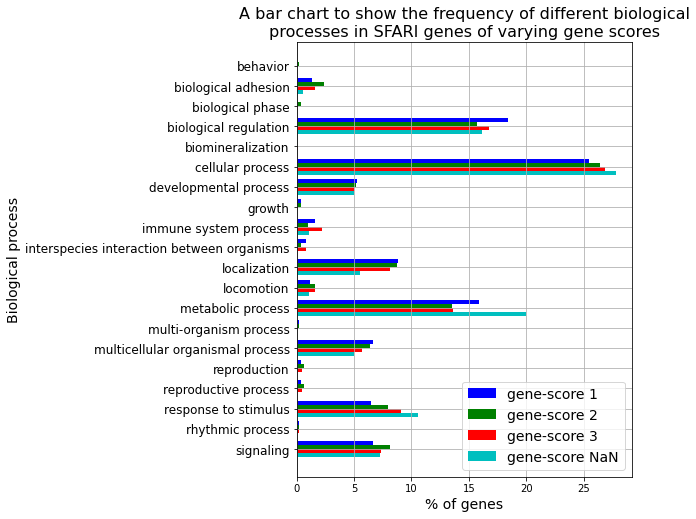

In [29]:
ax = plt.subplot()

s1, s2, s3, s4 = s1.sort_values("2"), s2.sort_values("2"), s3.sort_values("2"), s4.sort_values("2")

data = [s1, s2, s3, s4]
cat_labels = [s["2"].values for s in data]
num_genes = [s["3"].values for s in data]
num_genes = [100*n/np.sum(n) for n in num_genes]

og_process_labels = get_all_unique_cats(cat_labels)
all_process_labels = np.array([s[:-13] for s in og_process_labels])

num_ticks = all_process_labels.size

width = 0.2
offsets = np.linspace(0.3,-0.3, num=4)
colours = ["b", "g", "r", "c"]
ticks = np.arange(num_ticks)*-1

plt_labels = ["gene-score 1", "gene-score 2", "gene-score 3", "gene-score NaN"]


for f in range(4):
    f_ticks = get_ticks(cat_labels[f], og_process_labels, ticks)
    ax.barh(f_ticks + offsets[f], width=num_genes[f], height=width, color=colours[f], align="center", label=plt_labels[f])
    
ax.set_yticks(ticks)
ax.set_yticklabels(all_process_labels, fontsize=12)
ax.set_ylabel("Biological process", fontsize=14)
ax.set_xlabel("% of genes", fontsize=14)
ax.set_title("A bar chart to show the frequency of different biological\nprocesses in SFARI genes of varying gene scores", fontsize=16)
ax.legend(loc="lower right", fontsize=14)
ax.figure.set_figheight(8)
plt.grid(True)
ax.figure.savefig(f'{os.getcwd()}/results/task2-5-bar-percentage.pdf', dpi=ax.figure.dpi)

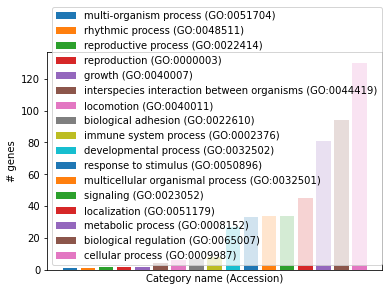

In [308]:
plot_pdb(s1)

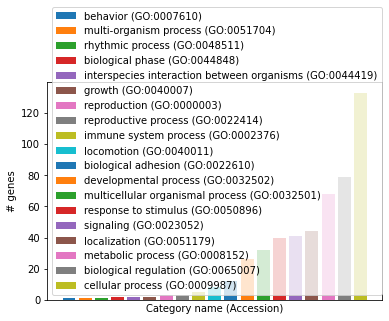

In [273]:
plot_pdb(s2)